In [1]:
seed = 13427256

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import norm
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA as sk_PCA
from mpl_toolkits import mplot3d
from sklearn.cluster import KMeans as sk_KMeans, DBSCAN as sk_DBSCAN
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import statsmodels.api as smf
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Q1 

In [3]:
df_songs = pd.read_csv("spotify52kData.csv")

In [4]:
df_songs

,songNumber,artists,album_name,track_name,popularity,duration,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.03220,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.92400,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.21000,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.90500,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.46900,0.000000,0.0829,0.167,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51995,51995,Don Omar;Trebol Clan,Perreo Tenebroso Vol. 3,Tu Cuerpo Me Arrebata,0,203653,False,0.819,0.6450,10,-6.707,0,0.0481,0.23200,0.000863,0.1780,0.724,94.998,4,hip-hop
51996,51996,Don Omar,Feliz Cumpleaños con Perreo,Dale Don Dale,1,212413,False,0.831,0.8180,2,-7.827,1,0.0824,0.02450,0.000319,0.0892,0.819,95.022,4,hip-hop
51997,51997,Don Omar,Última Misión Reggaeton,Dale Don Dale,0,212413,False,0.831,0.8180,2,-7.827,1,0.0824,0.02450,0.000319,0.0892,0.819,95.022,4,hip-hop
51998,51998,Moneybagg Yo;Pooh Shiesty;Lil Durk;EST Gee,Energy Hip Hop,Switches & Dracs,0,168620,True,0.727,0.6470,11,-7.383,0,0.2800,0.03290,0.000000,0.2460,0.529,159.959,4,hip-hop


# Q7 Can you predict whether a song is in major or minor key from valence using logistic regression or a support vector machine? If so, how good is this prediction? If not, is there a better one?

In [5]:
df_q7 = df_songs[['mode','valence']]
df_q7

,mode,valence
0,0,0.715
1,1,0.267
2,1,0.120
3,1,0.143
4,1,0.167
...,...,...
51995,0,0.724
51996,1,0.819
51997,1,0.819
51998,0,0.529


Text(0, 0.5, 'mode')

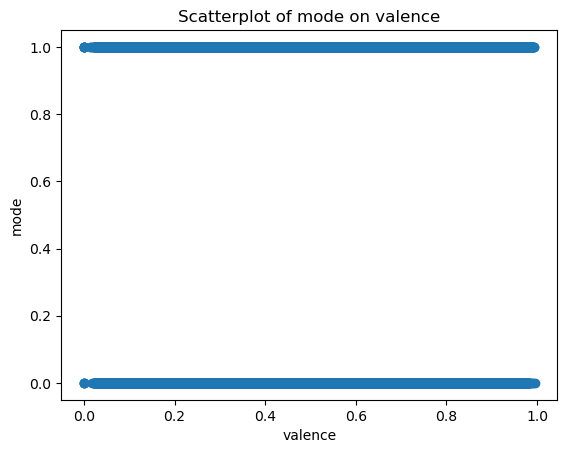

In [62]:
plt.scatter(df_q7[['valence']], df_q7[['mode']])
plt.title('Scatterplot of mode on valence')
plt.xlabel('valence')
plt.ylabel('mode')

Text(0.5, 1.0, 'Histogram of valence given mode')

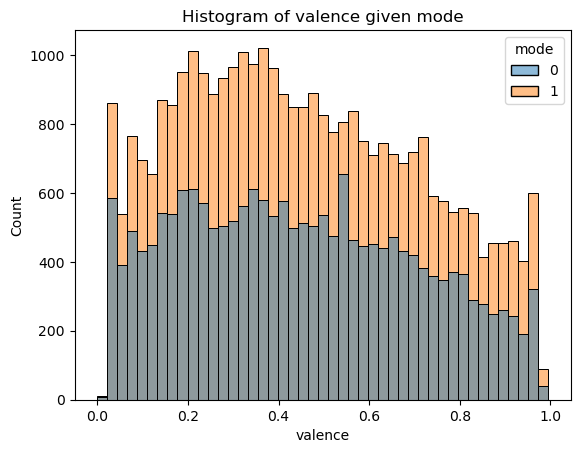

In [61]:
sns.histplot(df_q7, x="valence", hue="mode")
plt.title('Histogram of valence given mode')

In [10]:
def k_fold_cv_train(X_train, y_train, num_folds = 5, test_size=0.2):
    """
    Performs a k-fold validation backed training loop. Returns the best model.
    """
    best_model = None
    best_score = 0

    #CV training
    for fold in range(num_folds):
        model = LogisticRegression(random_state=16)
        
        # Split the data into training and validation sets for this fold
        X_train_fold, X_val_fold, y_train_fold, y_val_fold = train_test_split(X_train, y_train, test_size=test_size, random_state=fold)
        
        # Fit the model on the training data for this fold
        model.fit(X_train_fold.values.reshape(-1, 1), y_train_fold)
        
        # Calculate the accuracy on the validation set for this fold
        score = model.score(X_val_fold.values.reshape(-1, 1), y_val_fold)
        
        # Check if this fold has the best performance
        if score > best_score:
            best_score = score
            best_model = model
    
    return best_model

In [63]:
X_train, X_test, y_train, y_test = train_test_split(df_q7[['valence']], df_q7[['mode']], test_size=0.25, random_state=16)

In [64]:
logreg = k_fold_cv_train(X_train, y_train)

y_pred = logreg.predict(X_test.values.reshape(-1, 1))

/Users/mac/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/mac/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/mac/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/mac/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

In [65]:
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [66]:
# import the metrics class
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[   0, 4887],
       [   0, 8113]])

beta_1:  [[0.15196756]] beta_0:  [0.4242764]


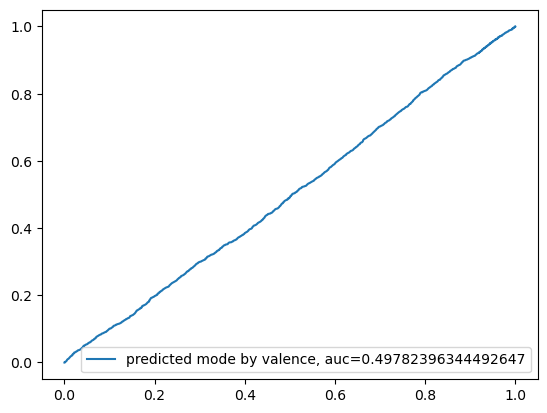

In [67]:
y_pred_proba = logreg.predict_proba(X_test.values.reshape(-1, 1))[::,1]
print("beta_1: ", logreg.coef_, "beta_0: ", logreg.intercept_)
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="predicted mode by valence, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [68]:
# sad try

In [27]:
probit=smf.Probit(y_train,X_train)
probit.fit()
print(probit.fit().summary())

Optimization terminated successfully.
         Current function value: 0.668125
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.668125
         Iterations 4
                          Probit Regression Results                           
Dep. Variable:                   mode   No. Observations:                39000
Model:                         Probit   Df Residuals:                    38999
Method:                           MLE   Df Model:                            0
Date:                Tue, 12 Dec 2023   Pseudo R-squ.:               -0.008003
Time:                        02:26:11   Log-Likelihood:                -26057.
converged:                       True   LL-Null:                       -25850.
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
valenc

In [35]:
y_pred = probit.fit().predict(X_test)

Optimization terminated successfully.
         Current function value: 0.668125
         Iterations 4


In [45]:
y_pred

pandas.core.series.Series

In [48]:
df_probit = pd.DataFrame({"y_pred": y_pred})
df_probit 

,y_pred
3844,0.619327
6842,0.550260
32672,0.546998
14234,0.674365
16440,0.549825
...,...
1076,0.674959
15500,0.610088
28680,0.535448
5467,0.542644


In [49]:
df_probit['y_pred_convert'] = np.where(df_probit['y_pred'] >= 0.5, 1, 0)

In [52]:
df_probit['y_pred_convert'].value_counts()

y_pred_convert
1    13000
Name: count, dtype: int64

In [54]:
accuracy_score(y_test, df_probit['y_pred_convert'].values)

0.6240769230769231

In [41]:
accuracy_score(y_test.values, y_pred)

ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [26]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[   0 4887]
 [   0 8113]]


In [29]:
classification_report(y_test, y_pred)

NameError: name 'classification_report' is not defined

In [5]:
correlation = df_songs['popularity'].corr(df_songs['duration'])
correlation

-0.054651195936376386

In [7]:
X = df_songs[['duration']]
y = df_songs['popularity']
regressor = LinearRegression()
regressor.fit(X, y)

LinearRegression()

In [8]:
slope = regressor.coef_[0]
intercept = regressor.intercept_

In [9]:
slope

-1.0097687784916687e-05

In [10]:
intercept

35.44141866435547

/var/folders/qj/xf2k81qj41qb71tk2gw82f5w0000gn/T/ipykernel_8095/2462266221.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='duration',


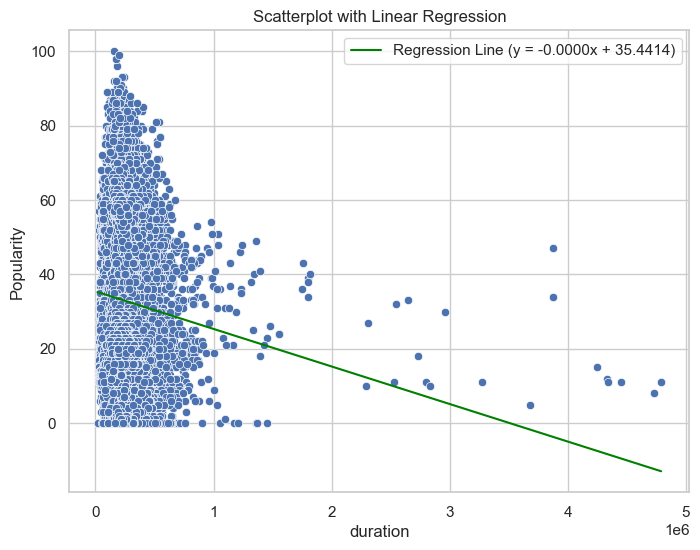

In [14]:
sns.set(style="whitegrid")  # Set seaborn style
plt.figure(figsize=(8, 6))  # Set the figure size
sns.scatterplot(x='duration',
                y='popularity',
                data=df_songs,
                palette='coolwarm',
                legend='full')

# Plot the regression line
x_range = np.linspace(df_songs['duration'].min(), df_songs['duration'].max(), 100)
y_pred = slope * x_range + intercept
plt.plot(x_range, y_pred, color='green', label=f'Regression Line (y = {slope:.4f}x + {intercept:.4f})')

# Add a title and labels
plt.title('Scatterplot with Linear Regression')
plt.xlabel('duration')
plt.ylabel('Popularity')

# Show the legend
plt.legend()

# Show the plot
plt.show()

In [16]:

X = sm.add_constant(X)
regressor = sm.OLS(y, X).fit()

# Perform a t-test for the slope parameter
t_statistic = regressor.tvalues['duration']
p_value = regressor.pvalues['duration']

# Define the significance level (alpha)
alpha = 0.05

# Check if the p-value is less than alpha
if p_value < alpha:
    print(f'The p-value ({p_value:.4f}) is less than alpha ({alpha}), so the slope is statistically significant.')
else:
    print(f'The p-value ({p_value:.4f}) is greater than alpha ({alpha}), so the slope is not statistically significant.')

# Print the t-statistic and p-value
print(f'T-Statistic: {t_statistic:.4f}')
print(f'P-Value: {p_value:.4f}')

The p-value (0.0000) is less than alpha (0.05), so the slope is statistically significant.
T-Statistic: -12.4808
P-Value: 0.0000


In [17]:
print(regressor.summary())

                            OLS Regression Results                            
Dep. Variable:             popularity   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     155.8
Date:                Mon, 11 Dec 2023   Prob (F-statistic):           1.07e-35
Time:                        02:31:49   Log-Likelihood:            -2.3383e+05
No. Observations:               52000   AIC:                         4.677e+05
Df Residuals:                   51998   BIC:                         4.677e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         35.4414      0.209    169.380      0.0

## With log transformation of the duration variable

In [46]:
df_songs = df_songs.assign(logduration=np.log(df_songs[['duration']]))

In [47]:
df_songs

,songNumber,artists,album_name,track_name,popularity,duration,explicit,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,logduration
0,0,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,...,0,0.1430,0.03220,0.000001,0.3580,0.715,87.917,4,acoustic,12.348726
1,1,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,...,1,0.0763,0.92400,0.000006,0.1010,0.267,77.489,4,acoustic,11.915787
2,2,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,...,1,0.0557,0.21000,0.000000,0.1170,0.120,76.332,4,acoustic,12.258788
3,3,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,...,1,0.0363,0.90500,0.000071,0.1320,0.143,181.740,3,acoustic,12.215691
4,4,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,...,1,0.0526,0.46900,0.000000,0.0829,0.167,119.949,4,acoustic,12.200321
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51995,51995,Don Omar;Trebol Clan,Perreo Tenebroso Vol. 3,Tu Cuerpo Me Arrebata,0,203653,False,0.819,0.6450,10,...,0,0.0481,0.23200,0.000863,0.1780,0.724,94.998,4,hip-hop,12.224173
51996,51996,Don Omar,Feliz Cumpleaños con Perreo,Dale Don Dale,1,212413,False,0.831,0.8180,2,...,1,0.0824,0.02450,0.000319,0.0892,0.819,95.022,4,hip-hop,12.266288
51997,51997,Don Omar,Última Misión Reggaeton,Dale Don Dale,0,212413,False,0.831,0.8180,2,...,1,0.0824,0.02450,0.000319,0.0892,0.819,95.022,4,hip-hop,12.266288
51998,51998,Moneybagg Yo;Pooh Shiesty;Lil Durk;EST Gee,Energy Hip Hop,Switches & Dracs,0,168620,True,0.727,0.6470,11,...,0,0.2800,0.03290,0.000000,0.2460,0.529,159.959,4,hip-hop,12.035403


In [48]:
correlation = df_songs['popularity'].corr(df_songs['logduration'])
correlation

-0.019362131361420048

In [50]:
X = np.log(df_songs[['duration']])
y = df_songs['popularity']
regressor = LinearRegression()
regressor.fit(X, y)

LinearRegression()

In [51]:
slope = regressor.coef_[0]
intercept = regressor.intercept_

In [52]:
slope

-1.0315146616294972

In [53]:
intercept

45.76636995249789

/var/folders/qj/xf2k81qj41qb71tk2gw82f5w0000gn/T/ipykernel_8095/1406061734.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='logduration',


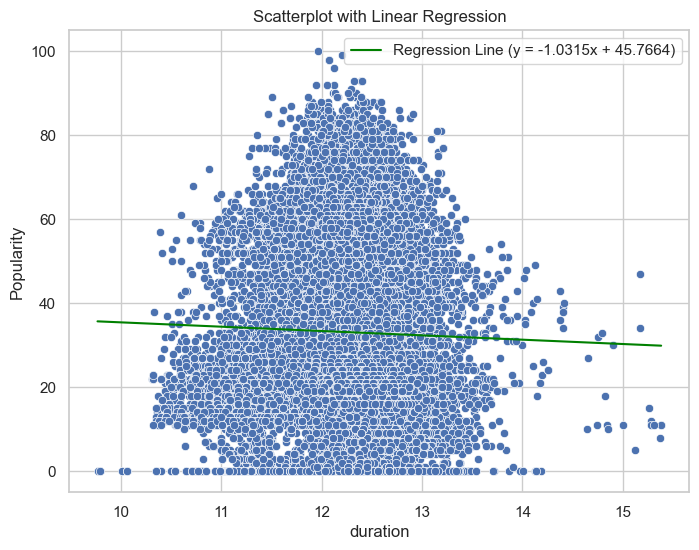

In [54]:
sns.set(style="whitegrid")  # Set seaborn style
plt.figure(figsize=(8, 6))  # Set the figure size
sns.scatterplot(x='logduration',
                y='popularity',
                data=df_songs,
                palette='coolwarm',
                legend='full')

# Plot the regression line
x_range = np.linspace(df_songs['logduration'].min(), df_songs['logduration'].max(), 100)
y_pred = slope * x_range + intercept
plt.plot(x_range, y_pred, color='green', label=f'Regression Line (y = {slope:.4f}x + {intercept:.4f})')

# Add a title and labels
plt.title('Scatterplot with Linear Regression')
plt.xlabel('duration')
plt.ylabel('Popularity')

# Show the legend
plt.legend()

# Show the plot
plt.show()

In [55]:
X = sm.add_constant(X)
regressor = sm.OLS(y, X).fit()

# Perform a t-test for the slope parameter
t_statistic = regressor.tvalues['duration']
p_value = regressor.pvalues['duration']

# Define the significance level (alpha)
alpha = 0.05

# Check if the p-value is less than alpha
if p_value < alpha:
    print(f'The p-value ({p_value:.4f}) is less than alpha ({alpha}), so the slope is statistically significant.')
else:
    print(f'The p-value ({p_value:.4f}) is greater than alpha ({alpha}), so the slope is not statistically significant.')

# Print the t-statistic and p-value
print(f'T-Statistic: {t_statistic:.4f}')
print(f'P-Value: {p_value:.4f}')

The p-value (0.0000) is less than alpha (0.05), so the slope is statistically significant.
T-Statistic: -4.4160
P-Value: 0.0000


In [56]:
print(regressor.summary())

                            OLS Regression Results                            
Dep. Variable:             popularity   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     19.50
Date:                Mon, 11 Dec 2023   Prob (F-statistic):           1.01e-05
Time:                        02:52:37   Log-Likelihood:            -2.3390e+05
No. Observations:               52000   AIC:                         4.678e+05
Df Residuals:                   51998   BIC:                         4.678e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         45.7664      2.866     15.967      0.0

# Q2 Are explicitly rated songs more popular than songs that are not explicit?

In [77]:
non_explicit = df_songs[df_songs['explicit'] == False][['popularity']]
non_explicit

,popularity
0,73
1,55
2,57
3,71
4,82
...,...
51994,1
51995,0
51996,1
51997,0


In [78]:
explicit = df_songs[df_songs['explicit'] == True][['popularity']]
explicit

,popularity
59,57
243,37
247,36
284,39
298,35
...,...
51963,1
51978,0
51988,1
51992,0


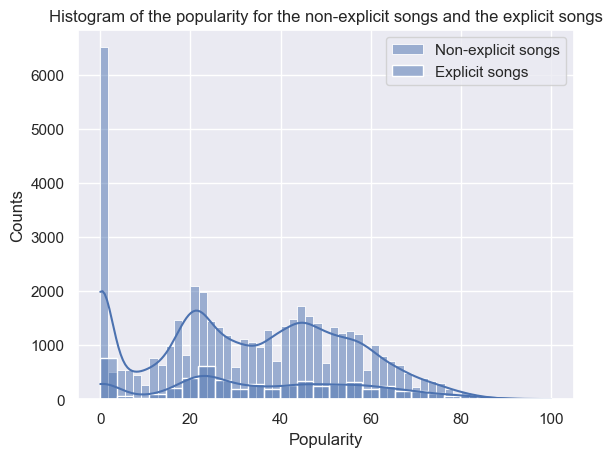

In [83]:

# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
sns.set(style="darkgrid")


sns.histplot(data=non_explicit, color="skyblue", label="Non-explicit songs", kde=True)
sns.histplot(data=explicit, color="red", label="Explicit songs", kde=True)

plt.xlabel('Popularity')
plt.ylabel('Counts')
plt.title("Histogram of the popularity for the non-explicit songs and the explicit songs")
plt.legend()
plt.show()

In [84]:
# difference in means
np.mean(non_explicit)-np.mean(explicit)

-3.0225187326645155

In [111]:
# difference in medians
np.median(non_explicit)-np.median(explicit)

-1.0

In [85]:
stats.mannwhitneyu(non_explicit, explicit) 

MannwhitneyuResult(statistic=array([1.20356318e+08]), pvalue=array([3.06791993e-19]))

In [86]:
stats.ttest_ind(non_explicit, explicit)

TtestResult(statistic=array([-9.83295046]), pvalue=array([8.50110344e-23]), df=array([51998.]))

Yes. Based on the p value, reject the null, accpet the alternative: population means are different. And explicitly rated songs more popular than songs that are not explicit songs. 

In [112]:
def statistic(x, y, axis):
    return np.mean(x, axis=axis) - np.mean(y, axis=axis)


In [113]:
from scipy.stats import permutation_test
res = permutation_test((non_explicit, explicit), statistic, alternative='less')

In [114]:
res

PermutationTestResult(statistic=array([-3.02251873]), pvalue=array([0.0001]), null_distribution=array([[ 0.04761601],
       [ 0.79642936],
       [-0.27293216],
       ...,
       [-0.36002676],
       [ 0.01618187],
       [-0.16181147]]))

In [115]:
res.null_distribution

array([[ 0.04761601],
       [ 0.79642936],
       [-0.27293216],
       ...,
       [-0.36002676],
       [ 0.01618187],
       [-0.16181147]])

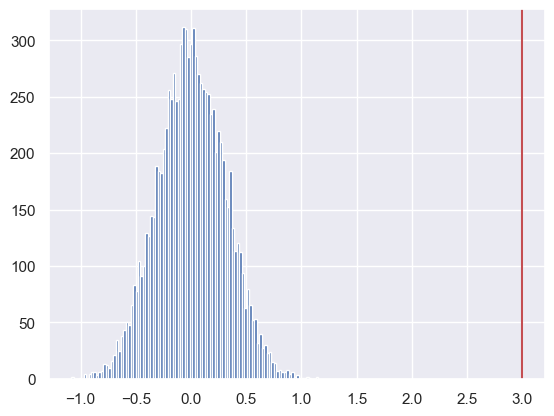

In [116]:
plt.hist(res.null_distribution, bins = 100)
plt.axvline(x = 3, color = 'r')

# Q6

When considering the 10 song features in the previous question, how many meaningful principal components can you extract? What proportion of the variance do these principal components account for? Using these principal components, how many clusters can you identify? Do these clusters reasonably correspond to the genre labels in column 20 of the data?

In [120]:
songs_feature = df_songs[['duration', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence','tempo']]
songs_feature

,duration,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,230666,0.676,0.4610,-6.746,0.1430,0.03220,0.000001,0.3580,0.715,87.917
1,149610,0.420,0.1660,-17.235,0.0763,0.92400,0.000006,0.1010,0.267,77.489
2,210826,0.438,0.3590,-9.734,0.0557,0.21000,0.000000,0.1170,0.120,76.332
3,201933,0.266,0.0596,-18.515,0.0363,0.90500,0.000071,0.1320,0.143,181.740
4,198853,0.618,0.4430,-9.681,0.0526,0.46900,0.000000,0.0829,0.167,119.949
...,...,...,...,...,...,...,...,...,...,...
51995,203653,0.819,0.6450,-6.707,0.0481,0.23200,0.000863,0.1780,0.724,94.998
51996,212413,0.831,0.8180,-7.827,0.0824,0.02450,0.000319,0.0892,0.819,95.022
51997,212413,0.831,0.8180,-7.827,0.0824,0.02450,0.000319,0.0892,0.819,95.022
51998,168620,0.727,0.6470,-7.383,0.2800,0.03290,0.000000,0.2460,0.529,159.959


In [126]:
class PCA():
    """A method for doing dimensionality reduction by transforming the feature
    space to a lower dimensionality, removing correlation between features and
    maximizing the variance along each feature axis.
    """
    def _init__(self):
        self.eigenValues=None
        self.components=None
    def transform(self, X, n_components):
        """ Fit the dataset to the number of principal components specified in the
        constructor and return the transformed dataset """
        covariance_matrix = self.calculate_covariance_matrix(X)

        # Where (eigenvector[:,0] corresponds to eigenvalue[0])
        eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

        # Sort the eigenvalues and corresponding eigenvectors from largest
        # to smallest eigenvalue and select the first n_components
        idx = eigenvalues.argsort()[::-1] # [3, 2, 1] ---> [2, 1, 0] --> [0, 1, 2]
        eigenvalues = eigenvalues[idx][:n_components]
        eigenvectors = np.atleast_1d(eigenvectors[:, idx])[:, :n_components]
        
        # Set the object variables
        self.eigenValues=eigenvalues
        self.components=eigenvectors

        # Project the data onto principal components
        X_transformed = X.dot(eigenvectors)

        return X_transformed
    
    def calculate_covariance_matrix(self, X, Y=None):
        """ Calculate the covariance matrix for the dataset X """
        if Y is None:
            Y = X
        n_samples = np.shape(X)[0]
        covariance_matrix = (1 / (n_samples-1)) * (X - X.mean(axis=0)).T.dot(Y - Y.mean(axis=0))

        return np.array(covariance_matrix, dtype=float)

In [136]:
pca_pipeline = Pipeline([('scaling', StandardScaler()), ('pca', sk_PCA())])
pca_pipeline.fit(songs_feature)

Pipeline(steps=[('scaling', StandardScaler()), ('pca', PCA())])

In [138]:
eigVals=pca_pipeline[1].explained_variance_

In [139]:
eigVals

array([2.73393354, 1.61739086, 1.38460532, 0.97960682, 0.87522623,
       0.8148464 , 0.67828163, 0.4715811 , 0.31313969, 0.13158071])

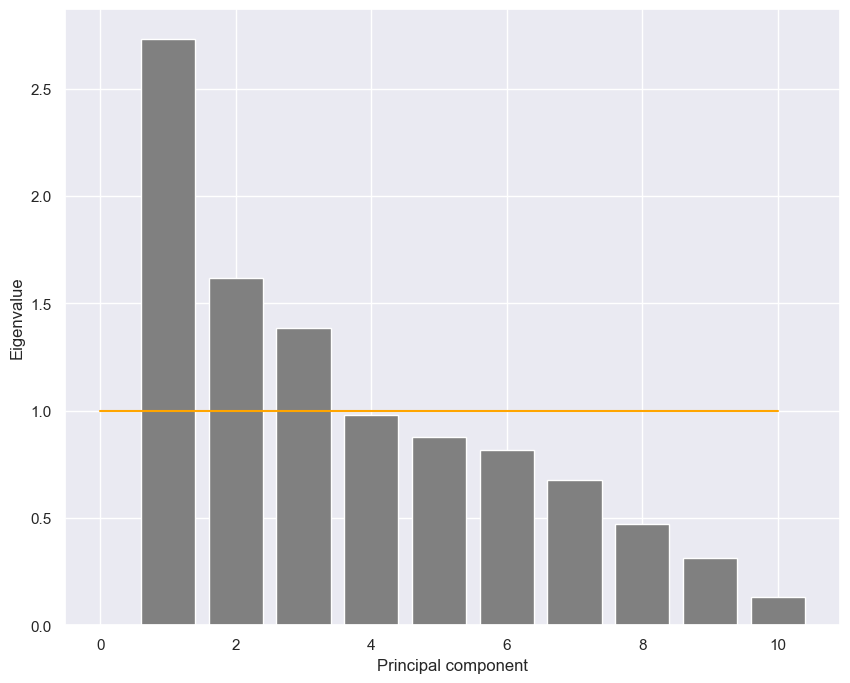

In [140]:
## Kaiser Criterion: Consider all principal components with eigen values greater than 1.0
eigVals=pca_pipeline[1].explained_variance_
nComponents = 10
x = np.linspace(1,nComponents, nComponents)
plt.figure(figsize=(10, 8))
plt.bar(x, eigVals, color='gray')
plt.plot([0,nComponents],[1,1],color='orange') # Orange Kaiser criterion line for the fox
plt.xlabel('Principal component')
plt.ylabel('Eigenvalue')
plt.show()

According to Kaiser Criterion we should consider 6 principal components, so the data after dimensionality reduction should be (52000,3) 

In [144]:
covarExplained = eigVals/sum(eigVals)*100
print("Variance explained by the 3 PCs above is: %.3f " % (sum(covarExplained[:3])))

Variance explained by the 3 PCs above is: 57.358 


In [147]:
## Do PCA and plot the features. Since there are three types of iris, ideally we should be able to see 3 well seperated clusters
pca=PCA()
feature_transformed=pca.transform(StandardScaler().fit_transform(songs_feature), 3)

In [153]:
feature_transformed

array([[-0.37984736, -1.37755861,  0.54161077],
       [ 3.58126802, -0.87816162,  0.39184167],
       [ 1.39242505,  0.29157812, -0.02938775],
       ...,
       [-1.11738173, -1.84936683, -0.87180054],
       [-1.06846075, -0.74607826,  0.63792617],
       [-1.68883284, -1.12300351, -1.25739698]])

In [165]:
df_feature_transformed = pd.DataFrame(feature_transformed, columns=['PC1','PC2',"PC3"])
df_feature_transformed

,PC1,PC2,PC3
0,-0.379847,-1.377559,0.541611
1,3.581268,-0.878162,0.391842
2,1.392425,0.291578,-0.029388
3,3.457680,0.868120,0.025002
4,1.125549,-0.190261,-0.399147
...,...,...,...
51995,-0.505407,-1.835487,-0.587458
51996,-1.117382,-1.849367,-0.871801
51997,-1.117382,-1.849367,-0.871801
51998,-1.068461,-0.746078,0.637926


In [166]:
genre = df_songs[["track_genre"]]
genre           

,track_genre
0,acoustic
1,acoustic
2,acoustic
3,acoustic
4,acoustic
...,...
51995,hip-hop
51996,hip-hop
51997,hip-hop
51998,hip-hop


In [167]:
genre.value_counts()

track_genre   
acoustic          1000
afrobeat          1000
dub               1000
dubstep           1000
edm               1000
electro           1000
electronic        1000
emo               1000
folk              1000
forro             1000
french            1000
funk              1000
garage            1000
german            1000
gospel            1000
goth              1000
grindcore         1000
groove            1000
grunge            1000
guitar            1000
happy             1000
hard-rock         1000
hardcore          1000
hardstyle         1000
heavy-metal       1000
drum-and-bass     1000
disney            1000
disco             1000
cantopop          1000
alt-rock          1000
alternative       1000
ambient           1000
anime             1000
black-metal       1000
bluegrass         1000
blues             1000
brazil            1000
breakbeat         1000
british           1000
chicago-house     1000
detroit-techno    1000
children          1000
chill             1

In [168]:
df_feature_transformed['genre'] = genre

In [179]:
cats = {v:k for k,v in enumerate(df_feature_transformed['genre'].unique())}

In [180]:
df_feature_transformed["num_genre"] = df_feature_transformed["genre"].apply(cats.get)

In [181]:
df_feature_transformed

,PC1,PC2,PC3,genre,num_genre
0,-0.379847,-1.377559,0.541611,acoustic,0
1,3.581268,-0.878162,0.391842,acoustic,0
2,1.392425,0.291578,-0.029388,acoustic,0
3,3.457680,0.868120,0.025002,acoustic,0
4,1.125549,-0.190261,-0.399147,acoustic,0
...,...,...,...,...,...
51995,-0.505407,-1.835487,-0.587458,hip-hop,51
51996,-1.117382,-1.849367,-0.871801,hip-hop,51
51997,-1.117382,-1.849367,-0.871801,hip-hop,51
51998,-1.068461,-0.746078,0.637926,hip-hop,51


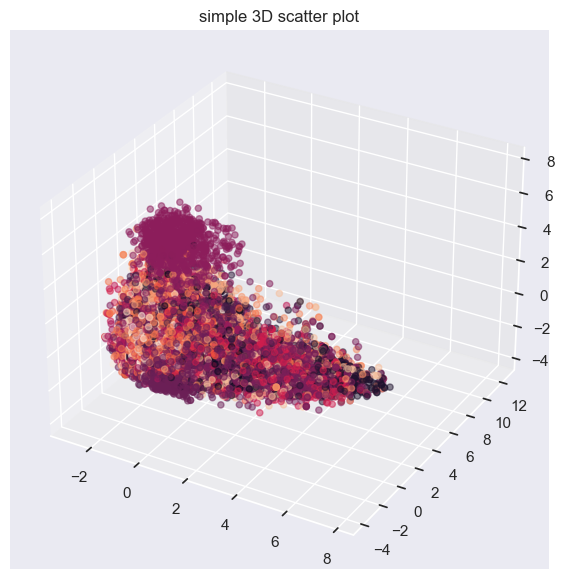

In [183]:
df_feature_transformed

# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(df_feature_transformed[['PC1']],df_feature_transformed[['PC2']],df_feature_transformed[['PC3']],alpha=0.5,c = df_feature_transformed[['num_genre']])
plt.title("simple 3D scatter plot")
 
# show plot
plt.show()

In [ ]:
l = []
for i in range(2, 53):
    km = sk_KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit_predict(feature_transformed)
    score = silhouette_score(feature_transformed, km.labels_, metric='euclidean')
    print('Silhouetter Score: %.3f' % score)
    l.append(score)

Silhouetter Score: 0.407
Silhouetter Score: 0.309
Silhouetter Score: 0.334
Silhouetter Score: 0.321
Silhouetter Score: 0.313
Silhouetter Score: 0.277
Silhouetter Score: 0.276
Silhouetter Score: 0.271
Silhouetter Score: 0.280


In [ ]:
l

In [204]:
km = sk_KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)

km.fit_predict(feature_transformed)

array([0, 2, 2, ..., 0, 0, 0], dtype=int32)

In [200]:
score = silhouette_score(feature_transformed, km.labels_, metric='euclidean')
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.309


In [201]:
cId = km.labels_ # vector of cluster IDs that the row belongs to
s = silhouette_samples(feature_transformed,cId) # compute the mean silhouette coefficient of all samples
sum(s)

16070.358327201322

/Users/mac/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/mac/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/qj/xf2k81qj41qb71tk2gw82f5w0000gn/T/ipykernel_8095/746311735.py:20: UserWarning: The figure layout has changed to tight
  plt.tight_layout() # adjusts subplot padding
/Users/mac/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_in

KeyboardInterrupt: 

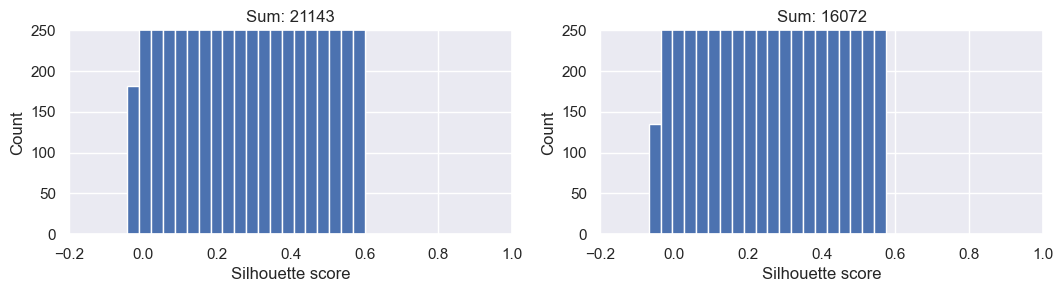

In [202]:
numClusters = 9 # how many clusters are we looping over? (from 2 to 52)
Q = np.empty([numClusters,1])*np.NaN # init container to store sums

# Compute kMeans:
plt.figure(figsize=(16, 8))
for ii in range(2, 10): # Loop through each cluster (from 2 to 10!)
    kMeans = sk_KMeans(n_clusters = int(ii)).fit(feature_transformed) # compute kmeans using scikit
    cId = kMeans.labels_ # vector of cluster IDs that the row belongs to
    cCoords = kMeans.cluster_centers_ # coordinate location for center of each cluster
    s = silhouette_samples(feature_transformed,cId) # compute the mean silhouette coefficient of all samples
    Q[ii-2] = sum(s) # take the sum
    # Plot data:
    plt.subplot(3,3,ii-1) 
    plt.hist(s,bins=20) 
    plt.xlim(-0.2,1)
    plt.ylim(0,250)
    plt.xlabel('Silhouette score')
    plt.ylabel('Count')
    plt.title('Sum: {}'.format(int(Q[ii-2]))) # sum rounded to nearest integer
    plt.tight_layout() # adjusts subplot padding


ValueError: x and y must have same first dimension, but have shapes (9,) and (51, 1)

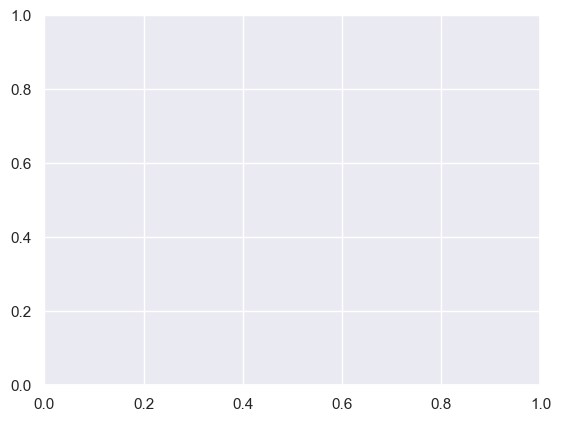

In [194]:
plt.plot(np.linspace(2,52,9),Q)
plt.xlabel('Number of clusters')
plt.ylabel('Sum of silhouette scores')
plt.show()

In [185]:
feature_transformed

array([[-0.37984736, -1.37755861,  0.54161077],
       [ 3.58126802, -0.87816162,  0.39184167],
       [ 1.39242505,  0.29157812, -0.02938775],
       ...,
       [-1.11738173, -1.84936683, -0.87180054],
       [-1.06846075, -0.74607826,  0.63792617],
       [-1.68883284, -1.12300351, -1.25739698]])

In [195]:
np.linspace(2,11,9)

array([ 2.   ,  3.125,  4.25 ,  5.375,  6.5  ,  7.625,  8.75 ,  9.875,
       11.   ])

In [197]:
np.linspace(2,52,20)

array([ 2.        ,  4.63157895,  7.26315789,  9.89473684, 12.52631579,
       15.15789474, 17.78947368, 20.42105263, 23.05263158, 25.68421053,
       28.31578947, 30.94736842, 33.57894737, 36.21052632, 38.84210526,
       41.47368421, 44.10526316, 46.73684211, 49.36842105, 52.        ])